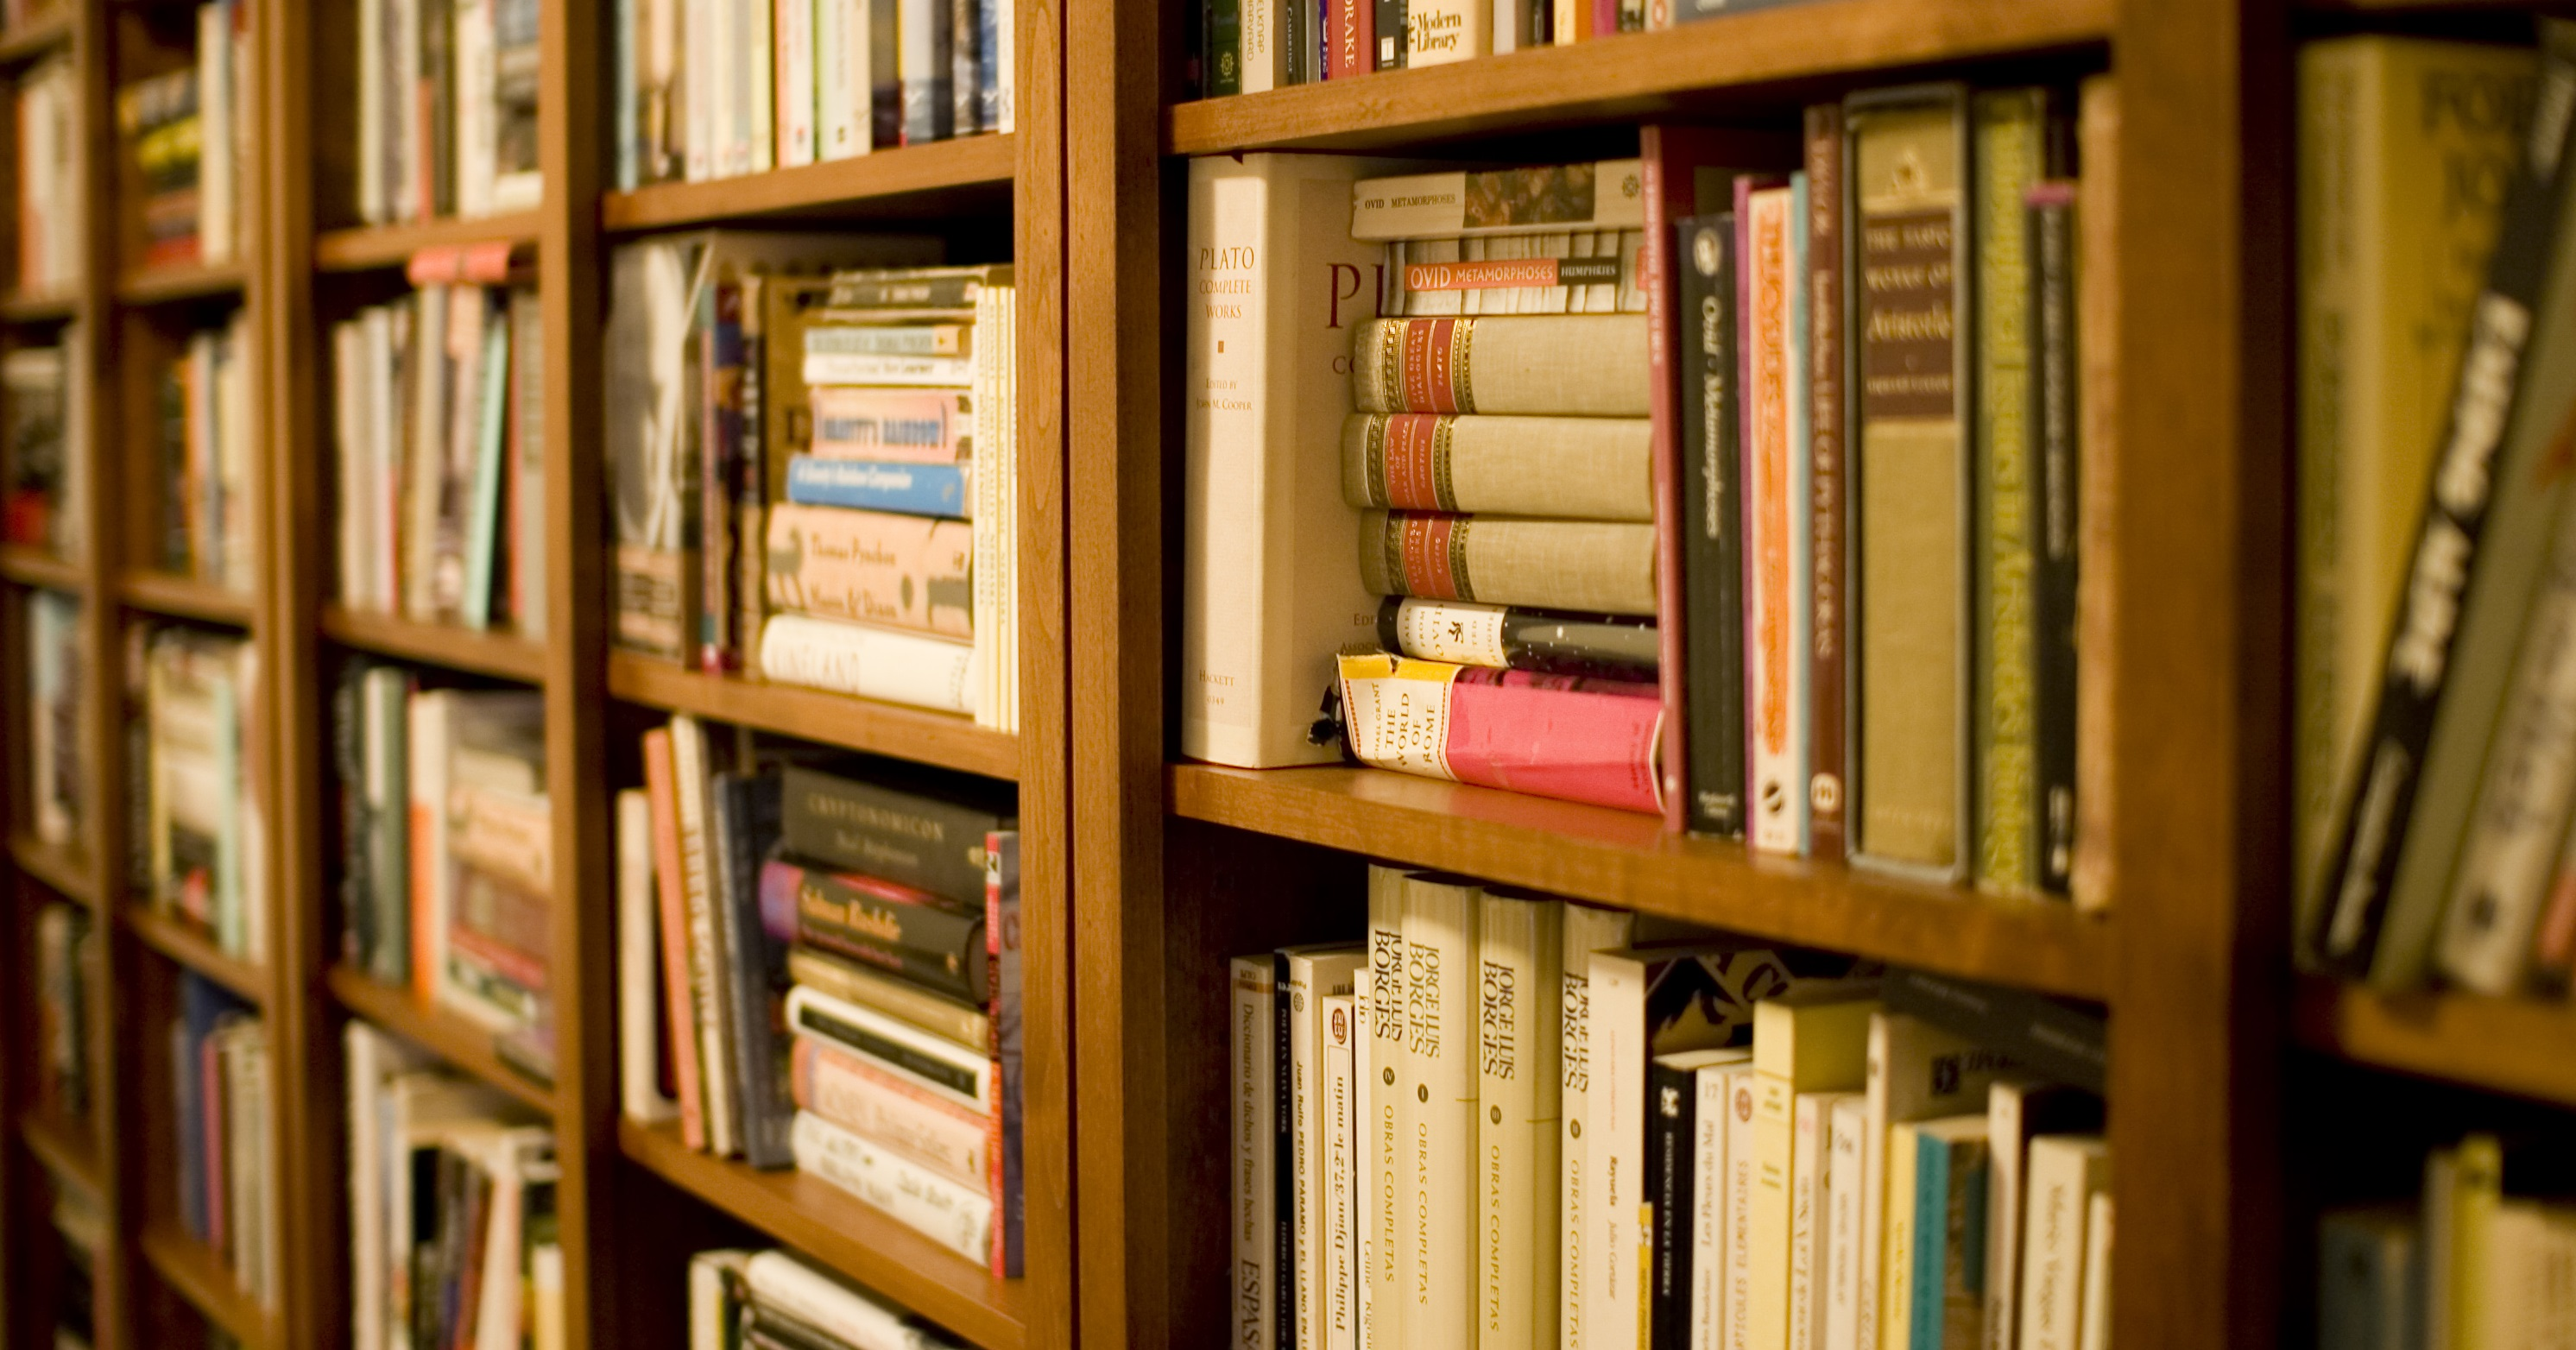

#Problem statement
We have dataset of books ,containing informations related to rating,books and users, Based on dataset we have to make a recommendation system.

- We have to create a Recommendation  system for figuring out Top 50 Books to suggest the popular books to readers.
- To make a collaboration based recommendation system to suggest books to a reader based on preferences of person having same interests.


# Data Description:-
The Book-dataset comprises 3 files.

- **Users**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

- **Books**
Books are identified by their respective ISBN.
Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services.
- Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

- **Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# Importing Libraries

In [3]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
import seaborn as sns   #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib
%matplotlib inline

# Loading data

In [4]:
books=pd.read_csv("/content/Books.csv") #loading books file
rating=pd.read_csv("/content/Ratings.csv")  #loading rating file
users=pd.read_csv("/content/Users.csv") #loading users file

<ipython-input-4-b6f6e2270f15>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("/content/Books.csv") #loading books file


- shape of data

In [5]:
print("shape of books",books.shape) #shape of book file
print("shape of rating",rating.shape)   #shape of rating file
print("shape of users",users.shape) #shape of users file

shape of books (271360, 8)
shape of rating (1149780, 3)
shape of users (278858, 3)


In [6]:
#top 5 rows of dataset books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
#Top 5 dataset of dataset rating
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
#top 5 rows of dataset user
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
#checking for null values in book file
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
#checking for null values in users rating
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
#checking for null values in users file
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
#filtering required columns and removing non-essential columns
books=books[["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher"]]

- ** Age can play important role while making collaborative filter based system to select more relative content based on age group but there are more than 30% missing values,so we need to drop this feature.**

In [13]:
#removing age from users dataset
users.drop(["Age"],axis=1,inplace=True)

In [14]:
#checking for duplicate entries in books dataset
books.duplicated().sum()


0

In [15]:
#checking for duplicate entries in rating dataset
rating.duplicated().sum()

0

In [16]:
#checking for duplicate entries in users dataset
users.duplicated().sum()

0

In [17]:
#merging rating and Books dataset and assigning into dataframe 'data'
data=rating.merge(books,on="ISBN")


In [18]:
#merging dataset data with users dataset and storing into dataframe 'final_data'
final_data=users.merge(data,on="User-ID")

In [19]:
#shape of final dataset
final_data.shape

(1031136, 8)

In [20]:
#top 5 rows of final_dataset
final_data.head()

,User-ID,Location,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,8,"timmins, ontario, canada",0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,8,"timmins, ontario, canada",0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,8,"timmins, ontario, canada",0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


# Total Rating By users
- filtering out rating on each book by users

In [21]:
#Total rating count for each book
#grouping on "book-title" for total ratings for each "book title" and changing column name from book-Rating to Count rating"
count_rating_df=final_data.groupby("Book-Title")["Book-Rating"].count().reset_index().rename(columns={"Book-Rating":"Count_Rating"})
count_rating_df=count_rating_df.sort_values("Count_Rating",ascending=False) #sorting from higher to lower rating
count_rating_df

,Book-Title,Count_Rating
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
...,...,...
147559,Real Love: The Truth About Finding Uncondition...,1
147558,Real Love: The Drawings for Sean,1
147557,"Real Love or Fake (Camfield Novel of Love, No 78)",1
63664,Fabulous Food for Family and Friends: Healthy ...,1


# Average rating for each book
- Some users rate book as zero, to find average rating for a book we need to calculate mean of ratings

- **example - if user_1 gives rating as rate_1 and user_2 gives rating as rate_2 then average rating will be (rate_1+rate_2)/2.**


In [22]:
# mean rating for each book title based on ratings
avg_rating_df=final_data.groupby("Book-Title").mean()["Book-Rating"].reset_index()
avg_rating_df.rename(columns={"Book-Rating":"Avg_Rating"},inplace=True)
avg_rating_df

<ipython-input-22-456af9f036d1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df=final_data.groupby("Book-Title").mean()["Book-Rating"].reset_index()


,Book-Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [23]:
#merging avg_rating and count_rating dataframe
pop=count_rating_df.merge(avg_rating_df,on="Book-Title").sort_values("Count_Rating",ascending=False)

In [24]:
#top 5 rows of dataframe pop
pop.head(5)

,Book-Title,Count_Rating,Avg_Rating
0,Wild Animus,2502,1.019584
1,The Lovely Bones: A Novel,1295,4.468726
2,The Da Vinci Code,898,4.642539
3,A Painted House,838,3.231504
4,The Nanny Diaries: A Novel,828,3.530193


- We will use rule to calculate weighted score
- formula is ((v*R) + (m*c)) / (v+m)= weighted_score(w)
- where v is count rating
- R is avg rating
- c is mean of avg rating
- m is count thresold

In [25]:
#selecting thersold count_rating for calculating weighted score
m=pop["Count_Rating"].quantile(0.98)
m

29.0

In [26]:
#avg of avg_rating of books
C= pop['Avg_Rating'].mean()
C

2.8901365864891466

In [27]:
#selecting only top 2% books for analysis as m is selected as 98%
Popular_Books= pop.copy().loc[pop["Count_Rating"]>=m]
Popular_Books.shape

(4891, 3)

In [28]:
#function for calculating weighted_score
def weighted_rating(pop,m=m,C=C): #initializing function
    v =pop['Count_Rating'] #calculating v('count_rating for book')
    R =pop['Avg_Rating']    #calculating R("mean of rating on a book")
    # Calculation based on the formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [29]:
# Define a new feature in dataset 'w_score' and calculate its value with `weighted_rating()`
Popular_Books['w_score'] =Popular_Books.apply(weighted_rating, axis=1)

In [30]:
#Sort movies based on score calculated above
Popular_Books=Popular_Books.sort_values('w_score',ascending=False)
Popular_Books.head(5)

,Book-Title,Count_Rating,Avg_Rating,w_score
2116,Free,56,8.017857,6.268400
59,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,5.664801
68,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.619745
142,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.468449
2518,Love You Forever,48,6.791667,5.322259


In [31]:
Top_50_Popular_Books=Popular_Books.sort_values("w_score",ascending=False).head(50)

In [32]:
Top_50_Popular_Books

,Book-Title,Count_Rating,Avg_Rating,w_score
2116,Free,56,8.017857,6.268400
59,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,5.664801
68,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.619745
142,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.468449
2518,Love You Forever,48,6.791667,5.322259
527,The Little Prince,141,5.815603,5.316553
87,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,5.300037
186,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,5.146813
4073,Where the Sidewalk Ends : Poems and Drawings,33,7.121212,5.142161
1471,Griffin &amp; Sabine: An Extraordinary Corresp...,72,6.041667,5.136772


# Top 10 Popular books

Text(0.5, 1.0, 'Popular books')

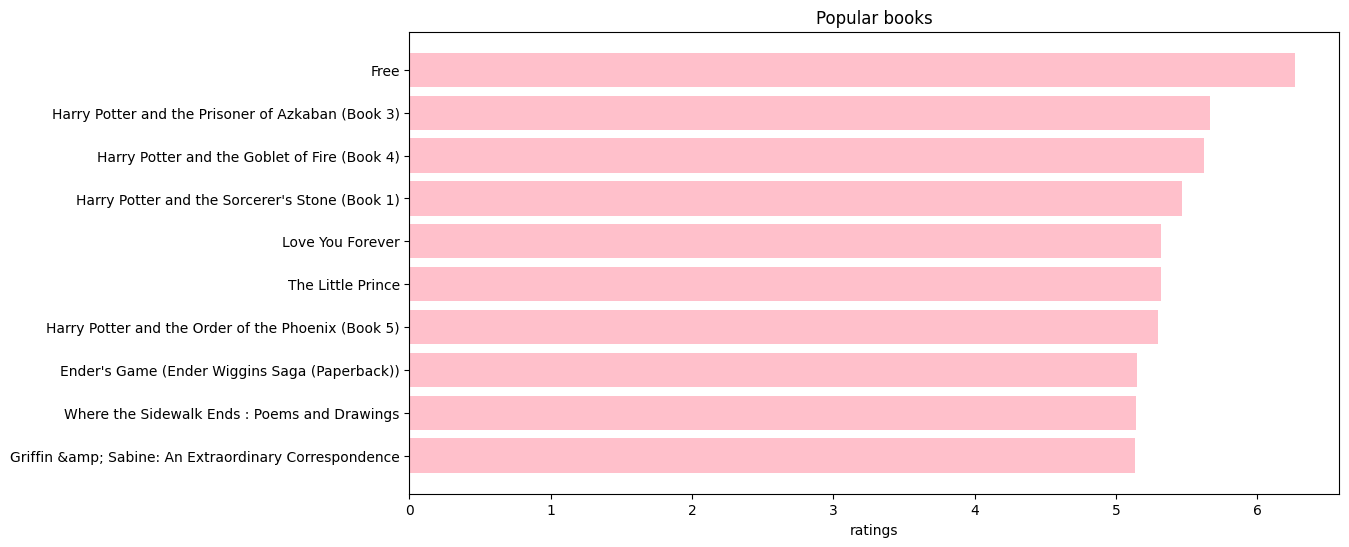

In [33]:
Popular_Books= Popular_Books.sort_values('w_score', ascending=False)
plt.figure(figsize=(12,6))

plt.barh(Popular_Books['Book-Title'].head(10),Popular_Books['w_score'].head(10), align='center',
        color='pink')
plt.gca().invert_yaxis()
plt.xlabel("ratings")
plt.title("Popular books")


# Collaborative filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

In [34]:
#we will make collaborative recommendation system on final_data
final_data.shape

(1031136, 8)

In [35]:
final_data.head()

,User-ID,Location,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,8,"timmins, ontario, canada",0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,8,"timmins, ontario, canada",0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,8,"timmins, ontario, canada",0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [36]:
#filtering out rating given by a users to any book
final_data.groupby("User-ID")["Book-Rating"].count()

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

- **observation-** Only 92106 users rate any book at any instance.

- **We will use data of users, who rated atleast 100 books.As they are dedicated learners and their rating can impact system positevely.**



In [37]:
x=final_data.groupby("User-ID")["Book-Rating"].count() >=100 #filtering users who rate atleast 100 books.
#calling them as most active users
most_active_users=x[x].index #getting indexes of filtered datapoints

- **Only 1659 users rates for atleast 100 books.**

In [38]:
#checking for most active users data in final_dataset
col_filter=final_data[final_data["User-ID"].isin(most_active_users)]
col_filter

,User-ID,Location,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
311,254,"minneapolis, minnesota, usa",0451167317,8,The Dark Half,Stephen King,1994,Signet Book
312,254,"minneapolis, minnesota, usa",043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
313,254,"minneapolis, minnesota, usa",0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
314,254,"minneapolis, minnesota, usa",0439064864,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic
315,254,"minneapolis, minnesota, usa",0553273604,0,Of Love and Shadows,Isabel Allende,1988,Bantam Books
...,...,...,...,...,...,...,...,...
1030506,278418,"omaha, nebraska, usa",1885222971,0,The Lion King: The Pal Patrol (Disney's \Story...,Inc. Staff Disney Enterprises,1997,Advance Publishers LLC
1030507,278418,"omaha, nebraska, usa",188522298X,0,101 Dalmatians: Proud to Be a Pup,Disney Enterprises Inc,1997,Advance Publishers LLC
1030508,278418,"omaha, nebraska, usa",1885222998,0,Aladdin: Wishful Thinking (Disney's Storytime ...,Disney Enterprises Inc,1997,Advance Publishers LLC
1030509,278418,"omaha, nebraska, usa",1892083043,0,Gotcha! Strategy Games for Math and Logic (Hom...,Denise Gaskins,1998,Tabletop Academy Pr


- **Observation:**  top 1659 users rates 592996 datapoints for books.

In [40]:
#finding books have atleast 50 ratings
y=col_filter.groupby("Book-Title").count()["Book-Rating"]>=50
most_rated_books=y[y].index #getting indexes of y

In [41]:
# checking for datapoints which are matching in "most rated books" and "col_filter" dataset
final_colab=col_filter[col_filter["Book-Title"].isin(most_rated_books)]
final_colab

,User-ID,Location,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
311,254,"minneapolis, minnesota, usa",0451167317,8,The Dark Half,Stephen King,1994,Signet Book
312,254,"minneapolis, minnesota, usa",043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
313,254,"minneapolis, minnesota, usa",0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
314,254,"minneapolis, minnesota, usa",0439064864,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic
316,254,"minneapolis, minnesota, usa",0671021001,7,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket
...,...,...,...,...,...,...,...,...
1029601,278418,"omaha, nebraska, usa",0679720200,0,The Stranger,ALBERT CAMUS,1989,Vintage
1029688,278418,"omaha, nebraska, usa",0688042171,0,If Tomorrow Comes,Sidney Sheldon,1985,William Morrow &amp; Company
1030032,278418,"omaha, nebraska, usa",0821759744,0,Dangerous,Becky Barker,1997,Kensington Publishing Corporation
1030252,278418,"omaha, nebraska, usa",1551661489,0,Legacy,Jayne Ann Krentz,1996,Mira Books


In [42]:
#creating a pivot to assign users rating for each books
pivot_colab=final_colab.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")
pivot_colab.fillna(0,inplace=True) #putting 0 where rating is not avaliable

In [43]:
pivot_colab

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#import cosine similarity to calculate similarity score
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
#calculating similarity score for each book with all other books
similarity_score=cosine_similarity(pivot_colab)

In [46]:
similarity_score

array([[1.        , 0.06550754, 0.09317747, ..., 0.07547772, 0.05810769,
        0.03029366],
       [0.06550754, 1.        , 0.02247675, ..., 0.04739871, 0.13548709,
        0.12388301],
       [0.09317747, 0.02247675, 1.        , ..., 0.09310325, 0.        ,
        0.        ],
       ...,
       [0.07547772, 0.04739871, 0.09310325, ..., 1.        , 0.05583662,
        0.0137213 ],
       [0.05810769, 0.13548709, 0.        , ..., 0.05583662, 1.        ,
        0.09410287],
       [0.03029366, 0.12388301, 0.        , ..., 0.0137213 , 0.09410287,
        1.        ]])

# collaboration based recommender

In [47]:
def recommend(book_name):   #initialising function
  index=np.where(pivot_colab.index==book_name)[0][0]
  similar_books=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6] #sorting high to low based on similarity scores
  #model wil show only 6 recommendation
  for i in similar_books: #looping to show recommended books
   print(pivot_colab.index[i[0]])

# Testing

- **Test 1**

In [48]:
# finding similar books
recommend("The Handmaid's Tale")

The Bone Collector (Lincoln Rhyme Novels (Paperback))
Bastard Out of Carolina
The Awakening
The Kitchen God's Wife
1984


- **Test 2**

In [49]:
recommend("The Awakening")

Courting Trouble
Over the Edge
Lily White
Guardian
Mortal Prey


- **Test 3**

In [56]:
recommend("Courting Trouble")

Mortal Prey
Last Man Standing
Move to Strike
City of Bones
The Awakening


- **Test 4**

In [57]:
recommend("Harry Potter and the Chamber of Secrets (Book 2)")

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)


# Conclusion

Based on above 3 tests we can see how recommender suggesting books based on similar interesrs.
- It is observing for "The Awakening","Mortal Prey" is in suggestion list for 2 or more tests.
- From test 4 it is cleaerly visible that on searching for a harry potter book it recommending interest of similar users as who reads one part,high chances to read more parts.